# 백준 7576번  
https://www.acmicpc.net/problem/7576
# 토마토
## BFS (좌표이동) + DFS

In [ ]:
# input 
# 행 : M , 열 : N
N,M = map(int,input().split())
A = []
for i in range(M):
    A.append(list(map(int,input().split())))
print(solution(M,N,A))    

## 필기
https://dev.plusblog.co.kr/42  
https://twpower.github.io/120-python-in-operator-time-complexity  
### 시간 복잡도
#### list  
in,append,pop,remove,copy(:) : O(N)
#### set
add, pop, remove : O(1)  
LIST[idx1][idx2] : O(1)
```
in : O(1)
s = {1, 2, 3, 4, 5}

# 멤버 확인
if 1 in s :
    print("1 is in s")

# 순회
for i in s :
    print(i)
```

In [ ]:
def Graph(A):
    gr = {}
    for i in range(len(A)):
        for j in range(len(A[0])):
            if A[i][j]==1:
                if gr.get(1):
                    gr[1].add((i,j))
                else:
                    gr[1]={(i,j)}
            elif A[i][j]==-1:
                if gr.get(-1):
                    gr[-1].add((i,j))
                else:
                    gr[-1]={(i,j)}
#             else:
#                 if gr.get(0):
#                     gr[0].add((i,j))
#                 else:
#                     gr[0]={(i,j)}
    return gr

In [ ]:
from collections import deque
def bfs(graph,start):
    next_visit=deque(start) # 1차원
    while next_visit:
        next = next_visit.popleft()
        next_ripe = is_available(next)
        if next_ripe:
            for i in next_ripe: # graph update
                graph[1].add(i)
    

In [ ]:
def is_available(next):
    # (+1,0),(-1,0),(0,+1),(0,-1) # 행, 열
    # 전체 범위 내에 존재 여부
    # -1(토마토가 들어있지 않은 칸)인 경우
    x,y = next
    result = set()
    for (dx,dy) in [(+1,0),(-1,0),(0,+1),(0,-1)]:
        if (x+dx <M) and (x+dx>=0) and (y+dy<N) and (y+dy>=0) and (next not in graph.get(-1,{})):
            
            result.add((x+dx,y+dy))
    return result

In [ ]:
def process():
    t=0
    while True:
        if M*N-len(graph.get(-1,[]))==len(graph.get(1,[])):
            return t
        else:
            bfs(graph,graph[1])
            t+=1

In [ ]:
def solution(M,N,A):
    graph = Graph(A)
    # 1이 하나라도 있을 경우
    if graph.get(1):
        # 다 익은 경우
        if M*N-len(graph.get(-1,[]))==len(graph.get(1,[])):
            return 0
        else:
            return process() 

    
    # 1이 하나도 없을 경우
    else:
        return -1
        

#### Trial 1 - 시간초과
##### 틀린 이유  
-1이 아닌 곳에만 가게끔했는데, 이렇게 되면 1이 계속 중복이 된다.   
차라리 0인 곳으로 접근하는 식으로 하자

In [ ]:
def Graph(A):
    gr = {}
    for i in range(len(A)):
        for j in range(len(A[0])):
            if A[i][j]==1:
                if gr.get(1):
                    gr[1].add((i,j))
                else:
                    gr[1]={(i,j)}
            elif A[i][j]==-1:
                if gr.get(-1):
                    gr[-1].add((i,j))
                else:
                    gr[-1]={(i,j)}
    return gr

from collections import deque
def bfs(graph,start):
    next_visit=deque(start) # 1차원
    while next_visit:
        next = next_visit.popleft()
        next_ripe = is_available(next,graph)
        if next_ripe:
            for i in next_ripe: # graph update
                graph[1].add(i)
                
def is_available(next,graph):
    # (+1,0),(-1,0),(0,+1),(0,-1) # 행, 열
    # 전체 범위 내에 존재 여부
    # -1(토마토가 들어있지 않은 칸)인 경우
    x,y = next
    result = set()
    for (dx,dy) in [(+1,0),(-1,0),(0,+1),(0,-1)]:
        if (x+dx <M) and (x+dx>=0) and (y+dy<N) and (y+dy>=0) and ((x+dx,y+dy) not in graph.get(-1,{})):
            
            result.add((x+dx,y+dy))
    return result

def process(graph,M,N):
    t=0
    while True:
        if M*N-len(graph.get(-1,[]))==len(graph.get(1,[])):
            return t
        else:
            before = graph[1].copy()
            bfs(graph,graph[1])
            t+=1
            if before == graph[1]:
                return -1
            
            
def solution(M,N,A):
    graph = Graph(A)
    # 1이 하나라도 있을 경우
    if graph.get(1):
        # 다 익은 경우
        if M*N-len(graph.get(-1,[]))==len(graph.get(1,[])):
            return 0
        else:
            return process(graph,M,N) 

    
    # 1이 하나도 없을 경우
    else:
        return -1
# input 
# 행 : M , 열 : N
N,M = map(int,input().split())
A = []
for i in range(M):
    A.append(list(map(int,input().split())))
print(solution(M,N,A))            

#### Trial 2 - Graph를 만들기 말고 Array를 그대로 활용하자->copy때문에 시간복잡도 증가

In [ ]:
from collections import deque
N,M = map(int,input().split())
A = []
empty = deque()
ripe = deque()
for i in range(M):
    array=list(map(int,input().split()))
    for j in range(N):
        if array[j]==1:
            ripe.append((i,j))
        elif array[j]==-1:
            empty.append((i,j))
    A.append(array)   

In [ ]:
# time step 1번
def solution():
    t=-1
    while ripe:
        t+=1
        bfs(ripe.copy()) # 시간복잡도 O(N)
    for i in range(M):
        for j in range(N):
            if A[i][j]==0:
                return -1
    return t    
            

In [ ]:
# time step 1번
def bfs(start):
    next_visit=start # queue
    while next_visit:
        next = next_visit.popleft()
        x, y = next
        for i,j in [(1,0),(-1,0),(0,1),(0,-1)]:
            new_x = x+i
            new_y = y+j
            if 0<=new_x<M and 0<=new_y<N and A[new_x][new_y]==0:
                A[new_x][new_y]=1 # 갱신
                ripe.append((new_x,new_y))

#### Trial 3 - Graph를 만들기 말고 Array를 그대로 활용하자

In [ ]:
# time step 1번
def solution():
    t=-1
    while ripe:
        t+=1
        l = len(ripe)
        for _ in range(l): # 시간복잡도 1로
            next = ripe.popleft()
            x, y = next
            for i,j in [(1,0),(-1,0),(0,1),(0,-1)]:
                new_x = x+i
                new_y = y+j
                if 0<=new_x<M and 0<=new_y<N and A[new_x][new_y]==0:
                    A[new_x][new_y]=1 # 갱신
                    ripe.append((new_x,new_y))
    for i in range(M):
        for j in range(N):
            if A[i][j]==0:
                return -1
    return t    
            

# 백준 9251번  
https://www.acmicpc.net/problem/9251
# LCS
## 대표적인 DP문제
### 배운 점  
2차원 배열로 DP, 2차원 list생성시 [0]*3이 아닌 [0 for _ in range(3)]

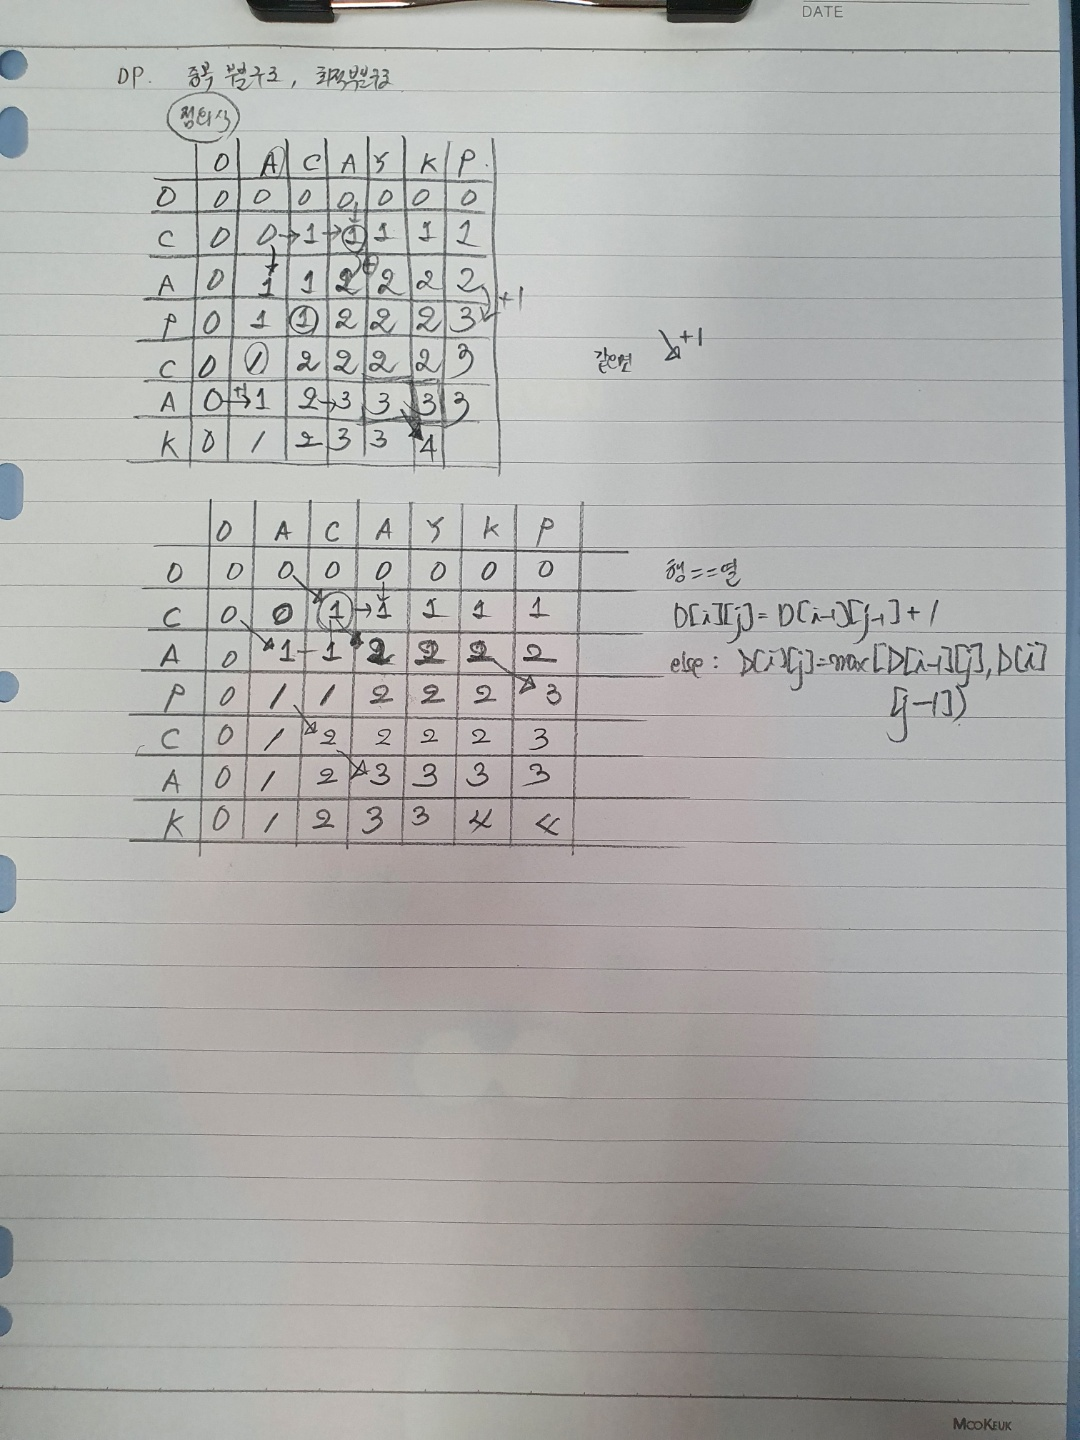

In [1]:
A = [0]+[i for i in input()]
B = [0]+[i for i in input()]

ACAYKP
CAPCAK


In [42]:
def dp():
    #table = [[0]*len(A)]*(len(B)) # A : 행 // B : 열 이렇게 하면 복사가 되버림
    table = [[0 for _ in range(len(A))] for _ in range(len(B))]
    for i in range(1,len(B)): # 행
        for j in range(1,len(A)): #  열
            # i,j 행, 열
            if B[i]==A[j]:
                table[i][j]=table[i-1][j-1]+1
            else:
                table[i][j]=max(table[i-1][j], table[i][j-1])
    return table
            

In [43]:
dp()

[[0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 1, 1, 1],
 [0, 1, 1, 2, 2, 2, 2],
 [0, 1, 1, 2, 2, 2, 3],
 [0, 1, 2, 2, 2, 2, 3],
 [0, 1, 2, 3, 3, 3, 3],
 [0, 1, 2, 3, 3, 4, 4]]

In [ ]:
def solution():
    result = dp()
    print(result[-1][-1])

# 백준 2655번  
https://www.acmicpc.net/problem/2655
# 가장 높은 탑 쌓기
## DFS로 접근하니깐 시간 초과가 나옴..

In [46]:
# input 
N = int(input())
graph={}
for i in range(1,N+1):
    area, height, weight = list(map(int,input().split()))
    graph[i]=[area,height,weight]

5
25 3 4
4 4 6
9 2 3
16 2 5
1 5 2


In [73]:
def is_available(next):
    result = deque()
    for i in graph.keys(): # 위
        if graph[i][0]<graph[next[-1]][0] and graph[i][-1]<graph[next[-1]][-1]: # 넓이가 크고, 무거워야한다
            result.append([i])
    return result

In [98]:
# dfs로 접근
from collections import deque
def dfs():
    visited=[]
    next_visit=deque([[_] for _ in range(1,N+1)])
    while next_visit:
        next=next_visit.pop()
        av = is_available(next)
        if av:
            for i in av:
                next_visit.append(next+i)
        else:
            visited.append(next)
    return visited

In [110]:
def solution():
    return sorted(dfs(),key = lambda i : score(i))[-1]
    

In [107]:
def score(visit):
    s=0
    for j in visit:
        s+=graph[j][1]
    return s

In [ ]:
anwer = solution()
print(len(answer))
answer.reverse
for i in answer:
    print(i)

# 백준 11053번  
https://www.acmicpc.net/problem/11053
# 가장 긴 증가하는 부분 수열
## DP

In [116]:
N = int(input())
A = list(map(int,input().split()))
def dp():
    table = [[0 for _ in range(N+1)] for _ in range(N+1)]
    for i in range(1,len(table)): # 행
        for j in range(i,len(table[0])): # 열
            if i==j:
                table[i][j]=1
                row_max = A[i]
            else:
                print(j)
                if row_max<A[j]:
                    table[i][j]+=1
                    row_max = A[j]
                else:
                    table[i][j]=table[i][j-1]
    return table
                

6
10 20 10 30 20 50


In [122]:
def dp():
    table = [[0 for _ in range(N+1)] for _ in range(N+1)]
    for i in range(1,len(table)): # 행
        for j in range(i,len(table[0])): # 열
            if i==j:
                table[i][j]=1
                row_max = A[i-1]
            else:
                print(j)
                print(row_max)
                if row_max<A[j-1]:
                    table[i][j]+=1
                    row_max = A[j-1]
                else:
                    table[i][j]=table[i][j-1]
    return table
                

In [123]:
dp()

2
10
3
20
4
20
5
30
6
30
3
20
4
20
5
30
6
30
4
10
5
30
6
30
5
30
6
30
6
20


[[0, 0, 0, 0, 0, 0, 0],
 [0, 1, 1, 1, 1, 1, 1],
 [0, 0, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1],
 [0, 0, 0, 0, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 1],
 [0, 0, 0, 0, 0, 0, 1]]